# 4. Восстановление функции распренделения вероятности
    1. Реализовать метод восстановления плотности вероятности двумя способами:
        1. EM-алгоритм
        2. Ядерное сглаживание
    2. Применить данные методы на любом наборе случайных точек
    3. Реализовать метод Метрополиса-Гастингса и Гибсона для несимметричного распределения. Применить два метода на основе той функции плотности, которая была восстановлена в прошлом пункте, тем самым получив изначальные точки.
    4. в методе М-Г нарисовать картинку блуждания в случае 3D-функции плотности (на доп баллы)
    5. Сравнить красный и синий набор точек (сгенерированые и исходные) (с помощью Расстояния Кульбака-Лейблера)

<Axes: ylabel='Count'>

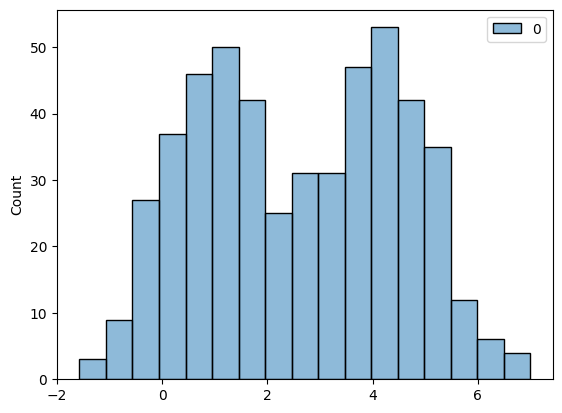

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
from sklearn.datasets import make_blobs


X, _ = make_blobs(n_samples=500, centers=2, random_state=0, n_features=1)
sns.histplot(X, binwidth=0.5)

In [12]:
def initialize_parameters(X, num_components):
    np.random.seed(0)
    n, d = X.shape
    weights = np.ones(num_components) / num_components
    means = X[np.random.choice(n, num_components, replace=False)]
    covariances = np.array([np.eye(d)] * num_components)
    return weights, means, covariances


def e_step(X, weights, means, covariances):
    num_components = len(weights)
    n = X.shape[0]
    responsibilities = np.zeros((n, num_components))

    for k in range(num_components):
        pdf = multivariate_normal.pdf(X, mean=means[k], cov=covariances[k])
        responsibilities[:, k] = weights[k] * pdf

    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    return responsibilities


def m_step(X, responsibilities):
    n, d = X.shape
    num_components = responsibilities.shape[1]
    weights = responsibilities.sum(axis=0) / n
    means = np.dot(responsibilities.T, X) / responsibilities.sum(axis=0)[:, np.newaxis]

    covariances = []
    for k in range(num_components):
        diff = X - means[k]
        cov = np.dot(responsibilities[:, k] * diff.T, diff) / responsibilities[:, k].sum()
        covariances.append(cov)
    covariances = np.array(covariances)

    return weights, means, covariances


def log_likelihood(X, weights, means, covariances):
    num_components = len(weights)
    log_likelihood = 0

    for k in range(num_components):
        pdf = multivariate_normal.pdf(X, mean=means[k], cov=covariances[k])
        log_likelihood += weights[k] * pdf

    return np.log(log_likelihood).sum()


def em_algorithm(X, num_components, max_iter=100, tol=1e-6):
    weights, means, covariances = initialize_parameters(X, num_components)
    log_likelihoods = []

    for iteration in range(max_iter):
        responsibilities = e_step(X, weights, means, covariances)
        weights, means, covariances = m_step(X, responsibilities)
        log_likelihood_val = log_likelihood(X, weights, means, covariances)
        log_likelihoods.append(log_likelihood_val)

        if iteration > 0 and np.abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break

    return weights, means, covariances, log_likelihoods

num_components = 2
weights, means, covariances, log_likelihoods = em_algorithm(X, num_components)

# Вывод результата
print("Весовые коэффициенты:", weights)
print("Средние значения:", means)
print("Ковариационные матрицы:", covariances)

Весовые коэффициенты: [0.51917322 0.48082678]
Средние значения: [[4.17603626]
 [0.92123954]]
Ковариационные матрицы: [[[1.01065103]]

 [[0.86530536]]]
